In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 7.3 MB/s 
     |████████████████████████████████| 283 kB 61.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85454 sha256=176868beadc19a6803608e8ffc6d26410ed4ff426e112865f7ab04fa3b4b22c6
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLP Specific imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

import contractions

In [ ]:
!pip install contractions

# Dummy Framweork to be followed
* Load the data
* Study the data so that we can understand it
* Performing the EDA 
* Cleaning the tweets
* Performing the EDA again
* Saving the cleaned data
* Choose a model
* Train the model, Evaluate and save it
* **Deploy**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/file.csv', encoding='ISO-8859-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Potential Problems : 
* No Colnames

In [ ]:
# df.loc[-1] = df.columns.values
# df.loc[-1]

In [ ]:
# Shift data from column header and rename it
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)

df.rename(columns=
    {"0": "target", "1467810369": "id", "Mon Apr 06 22:19:45 PDT 2009": "date", "NO_QUERY": "query", "_TheSpecialOne_": "users","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"text"},
    inplace=True)

In [ ]:
df.head()

,target,id,date,query,users,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# getting rid of un-necessary cols
not_needed = ['id', 'date', 'query', 'users']
df.drop(not_needed, inplace = True, axis = 1)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Performing the EDA (1)


In [ ]:
df.shape

(1600000, 2)

In [ ]:
df.size

3200000

In [ ]:
df.target.nunique()

3

In [ ]:
df.target.value_counts()

4    800000
0    799999
0         1
Name: target, dtype: int64

In [ ]:
df.target.dtype

dtype('O')

The datatype of the target variable is in `object` form.<br>
Make the datatype as `int32` to save memory and further processing

In [ ]:
df.target = df.target.astype(np.int32)

In [ ]:
df.target.dtype

dtype('int32')

In [ ]:
df.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

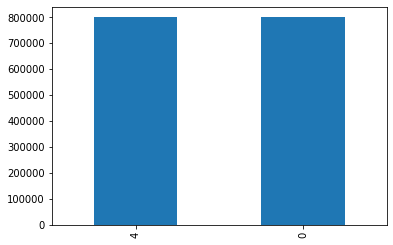

In [ ]:
df.target.value_counts().plot(kind = 'bar');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int32 
 1   text    1600000 non-null  object
dtypes: int32(1), object(1)
memory usage: 18.3+ MB


## Cleaning the data
Things to be cleaned :
1. Get rid of hyperlinks
2. Get rid of user mentions
3. Get rid of `can't` etc like words and convert them to `can not` etc.
4. Get rid of anything other than numbers
5. Get rid of stop words (optional || No for now)

In [ ]:
# 1. Getting rid of hyperlinks

def remove_links(text):
  """
  This function intakes the text data and removes the hyperlink from the text by using regex.
  """
  return re.sub('((www.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)

In [ ]:
# 2. Getting rid of user mentions

def remove_mentions(text):
  """
  This function intakes the text data and removes the user mentions from the text by using regex.
  """
  return re.sub('((@[^\s]+))',' ',text)

In [ ]:
# 3. Removing contractions
def remove_contractions(text):
  """
  This function removes the contractions from the given text.
  """
  return contractions.fix(text)

In [ ]:
# 4. Getting rid of punctuations and any other things

def remove_punctuations(text):
  """
  This function intakes the text data and removes the punctuations from the text by using regex.
  """
  return re.sub('[^a-zA-Z]',' ',text)

In [ ]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
%%time
# Cleaning the actual data
df['text'] = df.text.apply(lambda x: remove_links(x))
df['text'] = df.text.apply(lambda x: remove_mentions(x))
df['text'] = df.text.apply(lambda x: remove_contractions(x))
df['text'] = df.text.apply(lambda x: remove_punctuations(x))

CPU times: user 26.1 s, sys: 237 ms, total: 26.4 s
Wall time: 26.3 s


In [ ]:
df.head()

,target,text
0,0,Awww that is a bummer You shoulda got...
1,0,is upset that he cannot update his Facebook by...
2,0,I dived many times for the ball Managed to ...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all I am mad why...


## Exporting the clean data

In [ ]:
# df.to_csv("/content/drive/MyDrive/data/clean-data.csv", index = False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/clean-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df.head()

,target,text
0,0,Awww that is a bummer You shoulda got...
1,0,is upset that he cannot update his Facebook by...
2,0,I dived many times for the ball Managed to ...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all I am mad why...


## Trying to make a model on clean data

In [ ]:
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
    
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

0          Awww  that is a bummer   You shoulda got...
1    is upset that he cannot update his Facebook by...
2      I dived many times for the ball  Managed to ...
3      my whole body feels itchy and like its on fire 
4      no  it is not behaving at all  I am mad  why...
Name: text, dtype: object

In [ ]:
# df.to_csv("/content/drive/MyDrive/data/Stemmed-clean-data.csv", index = False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Stemmed-clean-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
full_df = pd.DataFrame(df, columns = ['text'])

In [ ]:
full_df.head()  

,text
0,Awww that is a bummer You shoulda got...
1,is upset that he cannot update his Facebook by...
2,I dived many times for the ball Managed to ...
3,my whole body feels itchy and like its on fire
4,no it is not behaving at all I am mad why...


In [ ]:
full_df = df['text'].tolist()
# full_df[:50]

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

In [ ]:
vocabulary_size=10000
onehot_representation=[one_hot(words, vocabulary_size) for words in full_df]
onehot_representation[:20]

[[5675,
  2124,
  250,
  6468,
  231,
  5669,
  6519,
  501,
  7953,
  4951,
  9940,
  3515,
  758,
  5530,
  4076,
  6454,
  3990],
 [250,
  2547,
  2124,
  4558,
  2380,
  4087,
  127,
  9831,
  7012,
  3543,
  6454,
  1587,
  7873,
  6212,
  5080,
  6468,
  4619,
  6283,
  4306,
  3250,
  403],
 [7409,
  7593,
  6160,
  891,
  3298,
  6347,
  3303,
  1775,
  5530,
  6705,
  6347,
  3913,
  9847,
  1377,
  9940,
  7401],
 [3195, 7014, 2066, 7729, 7357, 1587, 3705, 6578, 2886, 220],
 [2365,
  6454,
  250,
  8978,
  2722,
  1721,
  719,
  7409,
  3785,
  6154,
  3629,
  3785,
  7409,
  7927,
  1893,
  7409,
  2380,
  1931,
  5669,
  719,
  1735,
  6725],
 [8978, 6347, 7014, 3387],
 [6745, 6468, 3201],
 [5290,
  7865,
  9522,
  2365,
  1931,
  2964,
  2448,
  6468,
  5779,
  341,
  6468,
  5779,
  8183,
  7409,
  3785,
  5351,
  7298,
  2711,
  250,
  5669],
 [8135, 3394, 7304, 8978, 6365, 6454],
 [6508, 5028, 1634],
 [297, 1603, 2853, 8763, 7093, 6454, 250, 795],
 [7409, 2637, 6345, 26

In [ ]:
# Word Embedding
sentence_length=30
embedded_documents=pad_sequences(onehot_representation, padding='pre', maxlen=sentence_length)
print(embedded_documents[:20])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0 5675
  2124  250 6468  231 5669 6519  501 7953 4951 9940 3515  758 5530 4076
  6454 3990]
 [   0    0    0    0    0    0    0    0    0  250 2547 2124 4558 2380
  4087  127 9831 7012 3543 6454 1587 7873 6212 5080 6468 4619 6283 4306
  3250  403]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  7409 7593 6160  891 3298 6347 3303 1775 5530 6705 6347 3913 9847 1377
  9940 7401]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 3195 7014 2066 7729 7357 1587 3705 6578
  2886  220]
 [   0    0    0    0    0    0    0    0 2365 6454  250 8978 2722 1721
   719 7409 3785 6154 3629 3785 7409 7927 1893 7409 2380 1931 5669  719
  1735 6725]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 8978 6347
  7014 3387]
 [   0    0    0    0    0    0    0    0    0    0    0  

In [ ]:
# LSTM model
dimension=64
model_lstm=Sequential()
model_lstm.add(Embedding(vocabulary_size, dimension, input_length=sentence_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 64)            640000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               66000     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 706,101
Trainable params: 706,101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df['target']
le=LabelEncoder()
y=le.fit_transform(y)
type(y)
np.unique(y, return_counts=True)
X=np.array(embedded_documents)
y=np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
40000/40000 [==============================] - 206s 5ms/step - loss: 0.4308 - accuracy: 0.7987 - val_loss: 0.4037 - val_accuracy: 0.8142
Epoch 2/5
40000/40000 [==============================] - 198s 5ms/step - loss: 0.3887 - accuracy: 0.8233 - val_loss: 0.3934 - val_accuracy: 0.8204
Epoch 3/5
40000/40000 [==============================] - 197s 5ms/step - loss: 0.3657 - accuracy: 0.8365 - val_loss: 0.3923 - val_accuracy: 0.8220
Epoch 4/5
40000/40000 [==============================] - 196s 5ms/step - loss: 0.3466 - accuracy: 0.8466 - val_loss: 0.3949 - val_accuracy: 0.8213
Epoch 5/5
40000/40000 [==============================] - 196s 5ms/step - loss: 0.3296 - accuracy: 0.8561 - val_loss: 0.4051 - val_accuracy: 0.8191


In [ ]:
y_preds = model_lstm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds.round()))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    159815
           1       0.81      0.83      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

